<a href="https://colab.research.google.com/github/Gauravgade3/Spam-SMS-Classifier/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SMS Spam Classifier**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline
import string

In [4]:
# read data
df=pd.read_csv('/content/drive/MyDrive/Datasets/spam.csv',encoding="ISO-8859-1")

In [5]:
# check shape of data
df.shape

(5572, 5)

In [6]:
# Get first 5 rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df['v2'][5567]

'This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [8]:
# Last 5 rows
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
# checking the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# checking fot null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
# checking for identical rows
df.duplicated().sum()

403

In [12]:
# dropping the duplicate values
df = df.drop_duplicates(keep = 'first')

In [13]:
df.shape

(5169, 5)

In [14]:
# drop the un-necessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df.sample(5)

,v1,v2
4178,ham,Can Ì_ send me a copy of da report?
4367,ham,1 I don't have her number and 2 its gonna be a...
299,ham,Need a coffee run tomo?Can't believe it's that...
703,ham,"Thats a bit weird, even ?- where is the do sup..."
4082,ham,"Good afternoon, my love. It was good to see yo..."


In [16]:
# rename the columns
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [17]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [19]:
# Label Encoding the target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

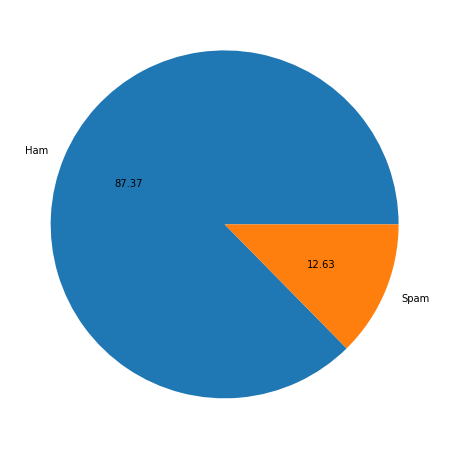

In [22]:
# plotting the percentage of spam and ham 
plt.rcParams[ 'figure.figsize' ] = [ 8, 8 ]
plt.pie(df['target'].value_counts(), labels = ['Ham','Spam'], autopct='%0.2f')
plt.show()

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['num_char']=df['text'].apply(len)

In [25]:
# tokenize the word from text
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
# tokenize the sentence from text
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [29]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [33]:
# define the function to transform the text
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)    
  
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)  



In [34]:
df['transform_text']=df['text'].apply(transform_text)

In [35]:
df.head()

,target,text,num_char,num_word,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

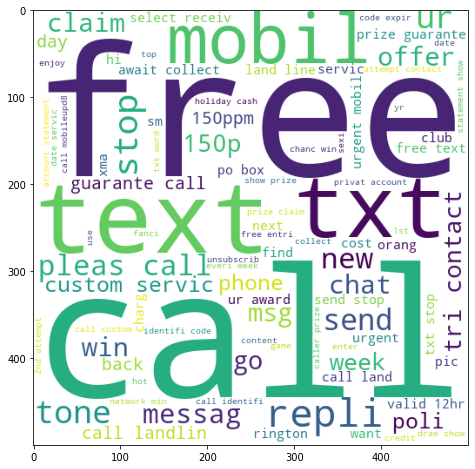

In [37]:
# Generating wordcloud
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

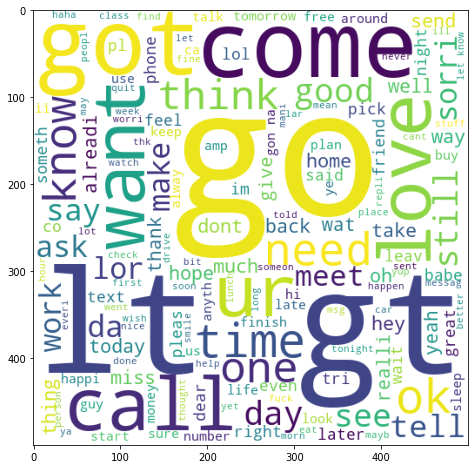

In [38]:

ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

# **Model Building**

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
cv=CountVectorizer()

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [40]:
X=cv.fit_transform(df['transform_text']).toarray()
X.shape

(5169, 6629)

In [41]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print("Gaussian NB with CountVectorizer\n")
print(f"Accuracy Score for Gaussian NB: {accuracy_score(y_test,y_pred1)}")
print(f"Confusion Matrix for Gaussian NB:\n {confusion_matrix(y_test,y_pred1)}")
print(f"Precision Score for Gaussian NB: {precision_score(y_test,y_pred1)}")

Gaussian NB with CountVectorizer

Accuracy Score for Gaussian NB: 0.8713733075435203
Confusion Matrix for Gaussian NB:
 [[769 116]
 [ 17 132]]
Precision Score for Gaussian NB: 0.532258064516129


In [44]:
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print("Multinomial NB with CountVectorizer\n")
print(f"Accuracy Score for Multinomial NB: {accuracy_score(y_test,y_pred2)}")
print(f"Confusion Matrix for Multinomial NB:\n {confusion_matrix(y_test,y_pred2)}")
print(f"Precision Score for Multinomial NB: {precision_score(y_test,y_pred2)}")

Multinomial NB with CountVectorizer

Accuracy Score for Multinomial NB: 0.9700193423597679
Confusion Matrix for Multinomial NB:
 [[871  14]
 [ 17 132]]
Precision Score for Multinomial NB: 0.9041095890410958


In [45]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print("Bernoulli NB with CountVectorizer\n")
print(f"Accuracy Score for Bernoulli NB: {accuracy_score(y_test,y_pred3)}")
print(f"Confusion Matrix for Bernoulli NB:\n {confusion_matrix(y_test,y_pred3)}")
print(f"Precision Score for Bernoulli NB: {precision_score(y_test,y_pred3)}")

Bernoulli NB with CountVectorizer

Accuracy Score for Bernoulli NB: 0.9671179883945842
Confusion Matrix for Bernoulli NB:
 [[881   4]
 [ 30 119]]
Precision Score for Bernoulli NB: 0.967479674796748


In [46]:
tfidf=TfidfVectorizer(max_features=3000)
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [47]:
X=tfidf.fit_transform(df['transform_text']).toarray()
X.shape


(5169, 3000)

In [48]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [49]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print("Gaussian NB with CountVectorizer\n")
print(f"Accuracy Score for Gaussian NB: {accuracy_score(y_test,y_pred1)}")
print(f"Confusion Matrix for Gaussian NB:\n {confusion_matrix(y_test,y_pred1)}")
print(f"Precision Score for Gaussian NB: {precision_score(y_test,y_pred1)}")

Gaussian NB with CountVectorizer

Accuracy Score for Gaussian NB: 0.867504835589942
Confusion Matrix for Gaussian NB:
 [[769 116]
 [ 21 128]]
Precision Score for Gaussian NB: 0.5245901639344263


In [52]:
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print("Multinomial NB with CountVectorizer\n")
print(f"Accuracy Score for Multinomial NB: {accuracy_score(y_test,y_pred2)}")
print(f"Confusion Matrix for Multinomial NB:\n {confusion_matrix(y_test,y_pred2)}")
print(f"Precision Score for Multinomial NB: {precision_score(y_test,y_pred2)}")

Multinomial NB with CountVectorizer

Accuracy Score for Multinomial NB: 0.9671179883945842
Confusion Matrix for Multinomial NB:
 [[885   0]
 [ 34 115]]
Precision Score for Multinomial NB: 1.0


In [53]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print("Bernoulli NB with CountVectorizer\n")
print(f"Accuracy Score for Bernoulli NB: {accuracy_score(y_test,y_pred3)}")
print(f"Confusion Matrix for Bernoulli NB:\n {confusion_matrix(y_test,y_pred3)}")
print(f"Precision Score for Bernoulli NB: {precision_score(y_test,y_pred3)}")

Bernoulli NB with CountVectorizer

Accuracy Score for Bernoulli NB: 0.9758220502901354
Confusion Matrix for Bernoulli NB:
 [[885   0]
 [ 25 124]]
Precision Score for Bernoulli NB: 1.0


In [54]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))